In [ ]:
# conectar a google drive para cargar los datos
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# from google.colab import files
# uploaded= files.upload()

In [ ]:
#archivo pkl
import pickle
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import preprocessing
from tensorflow.keras import models,layers
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import time

#cargar archivos dataset (es como dataset mnist)
with open('/content/drive/MyDrive/u/Colab Notebooks/New inteligence/Alerce/Copia de ALERCE_stamps_2020.pkl', 'rb') as f:
     data = pickle.load(f)
# with open('/content/drive/MyDrive/u/Colab Notebooks/New inteligence/Alerce/preproc.txt.npy', 'rb') as g:
    #  edited_images = np.load(g)


In [ ]:
# diccionario data
# data

In [ ]:
#info sobre como se cargan los datos
print(type(data))
print(len(data))

data.keys()

<class 'dict'>
3


dict_keys(['images', 'labels', 'metadata'])

In [ ]:
print(type(list(data.values())))
images, labels, metadata = list(data.values())
print(f'Dimensión imagen {images[0].shape}')

<class 'list'>
Dimensión imagen (63, 63, 3)


Alert Classification for the ALeRCE Broker System: The Real-time Stamp Classier

"The alert packet contains three images called stamps, which are cropped at 63 pixels on a side (1 pixel = 1 arcsec) from the original image and centered on the position of the source."

In [ ]:
#convertimos el diccionario a array
images_dataset = np.array(images,dtype=object)
labels_dataset = np.array(labels)
metdat_dataset = np.array(metadata)
data_keys = np.array(list(data))
# print(data_list.shape())
print(f'Cantidad de muestras {data_keys[0]}: {images_dataset.shape}, Tamaño 1 muestra: {images_dataset[0].shape}')
print(f'Cantidad de muestra {data_keys[1]}: {labels_dataset.shape}, Tamaño 1 muestra: {labels_dataset[0].shape}')
print(f'Cantidad de muestras {data_keys[2]}: {metdat_dataset.shape}, Tamaño 1 muestra: {metdat_dataset[0].shape}')

Cantidad de muestras images: (52244,), Tamaño 1 muestra: (63, 63, 3)
Cantidad de muestra labels: (52244,), Tamaño 1 muestra: ()
Cantidad de muestras metadata: (52244, 23), Tamaño 1 muestra: (23,)


In [ ]:
#Ejemplos de cada array:
# print(f'Ejemplo de {data_keys[0]}: {images_dataset[0]}')
# print(f'Ejemplo de {data_keys[1]}: {labels_dataset[0]}')
# print(f'Ejemplo de {data_keys[2]}: {metdat_dataset[0]}')

<BarContainer object of 5 artists>

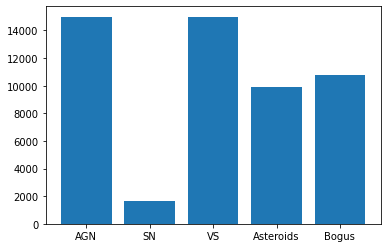

In [ ]:
#Cantidad de muestras por clase
count_labels = [(labels_dataset==0).sum(),(labels_dataset==1).sum(),(labels_dataset==2).sum(),
                (labels_dataset==3).sum(), (labels_dataset==4).sum()]
                
plt.bar(['AGN','SN','VS','Asteroids','Bogus'],count_labels)

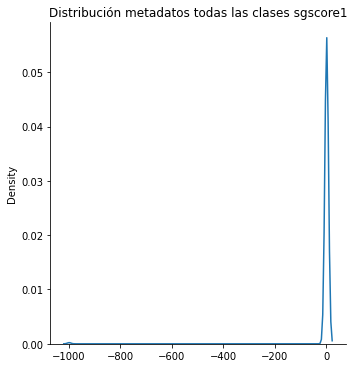

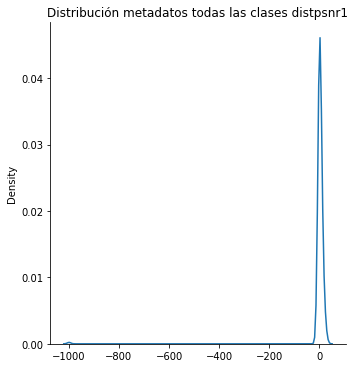

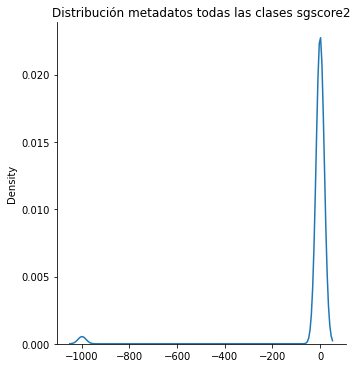

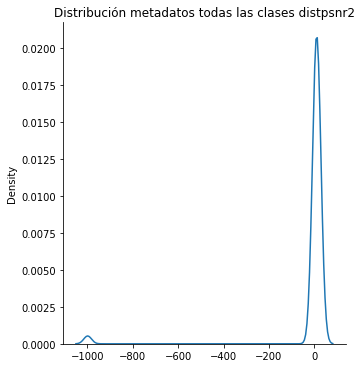

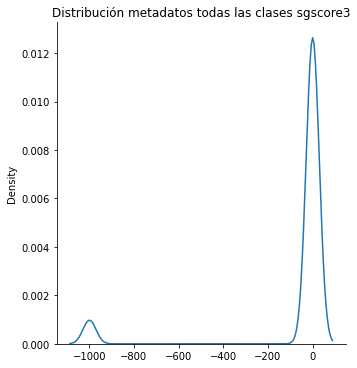

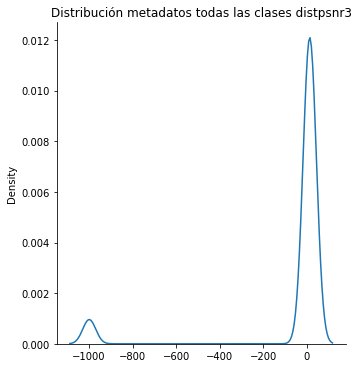

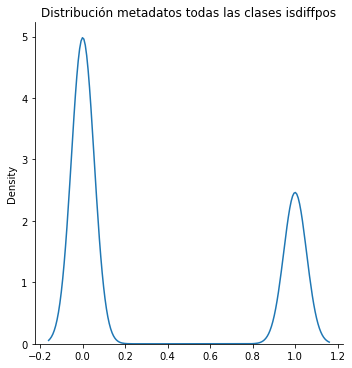

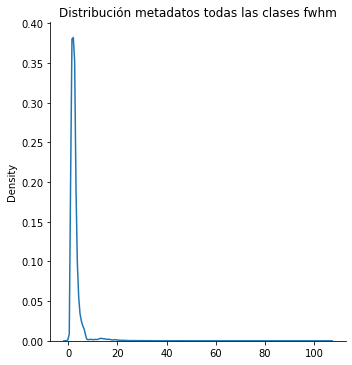

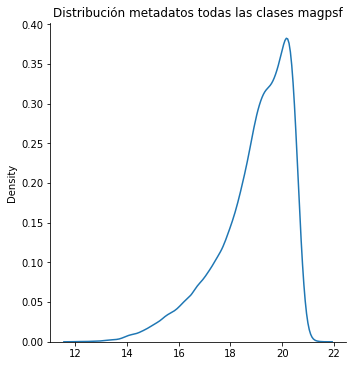

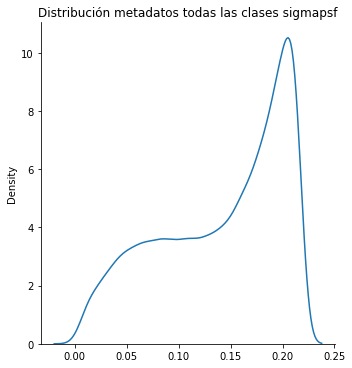

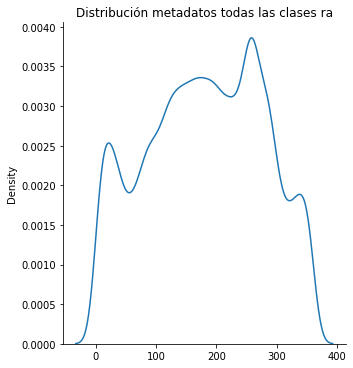

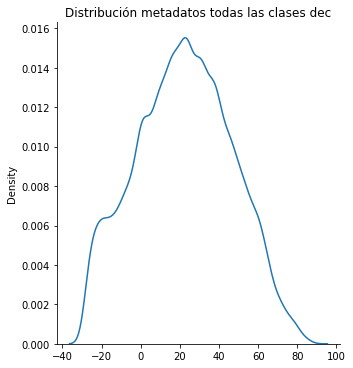

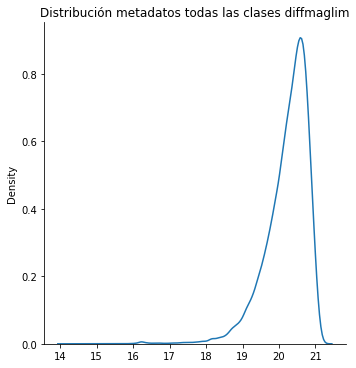

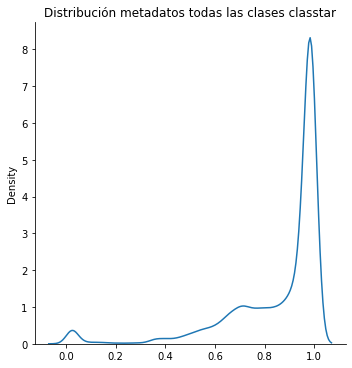

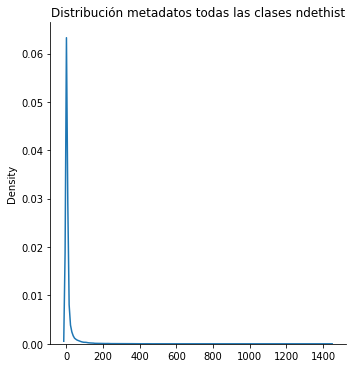

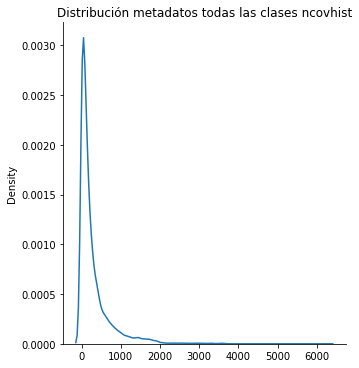

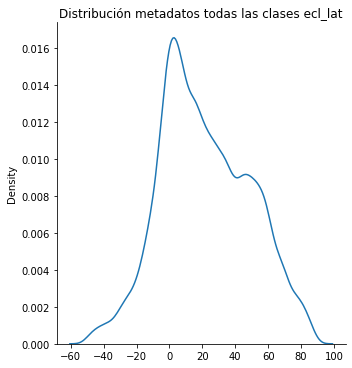

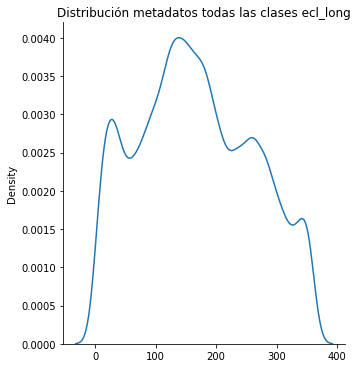

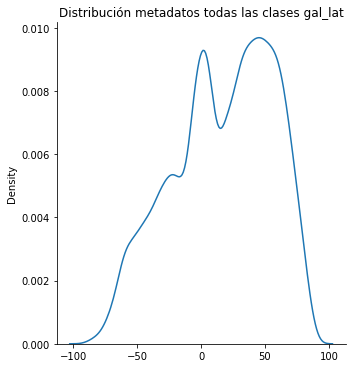

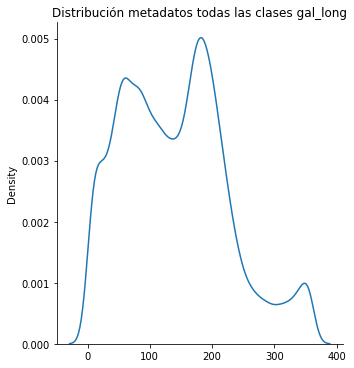

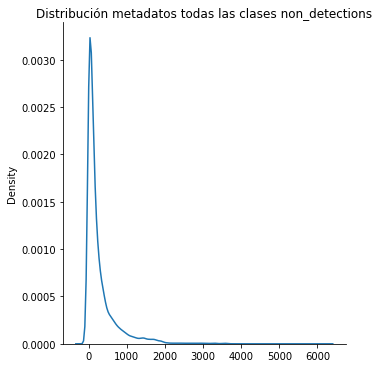

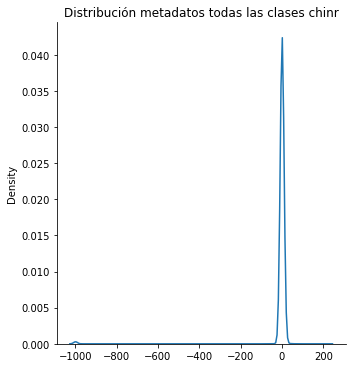

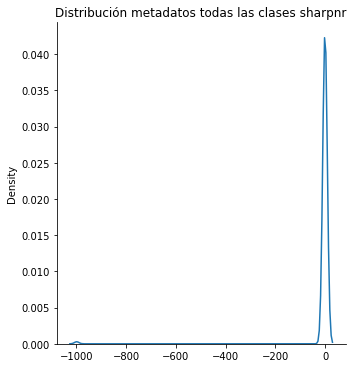

In [ ]:
#plot distribution metadata
#all images
metadata_keys = ['sgscore1', 'distpsnr1', 'sgscore2', 'distpsnr2', 'sgscore3',
   'distpsnr3', 'isdiffpos', 'fwhm', 'magpsf', 'sigmapsf',
   'ra', 'dec', 'diffmaglim', 'classtar', 'ndethist',
   'ncovhist', 'ecl_lat', 'ecl_long', 'gal_lat', 'gal_long',
   'non_detections', "chinr", "sharpnr"]

#Realiza un grafico con la distribución de cada feature
for i in range(23):
    sns.displot(metdat_dataset[:,i],kind="kde")
    plt.title(f'Distribución metadatos todas las clases {metadata_keys[i]}')
    plt.show()


#Limites superiores e inferiores de los metadatos. Se observó manualmente
                #                                                           #ra   #dec                             #ecl_lat
#upper_limits = [None, None, None, None, None, None, None, 25  , None, None, None, None,  None, None,  200,  2100, None,    None, 
#                None,    None,  2100,    None, None]
                #gal_lat        #non_det #chinr

#lower_limits = [-1,   -1,   -1,   -1,   -1,   -1,   None, None, None, None, None, None,  None, None,  None, None, None,   None, 
#                None,    None,  None,    -1,   -1]

In [ ]:
# Funcion para graficar las distribuciones de los metadatos por cada clase
# Se le pasa la clase ''c'' que se quiere graficar
# Se puede optar por mostrar los 23 graficos de metadatos por separado (grid=False)
#  o en una grilla (grid==True) con g_x * g_y la cantidad de plot por el eje x y el y.
def dist_class(c,r=23,grid=False,g_x=5,g_y=5,stop=(4,3)):
  if grid:
    fig, axs = plt.subplots(5,5,figsize=(20,18))
    count = 0
    for i in range(g_x):
        for j in range(g_y):
            if (i,j) == stop : break
            sns.kdeplot(metdat_dataset[labels_dataset == c][:,count], ax=axs[i,j])
            axs[i,j].set_title(f'Distribución metadatos {metadata_keys[count]}')
            count+=1
    fig.suptitle(f"clase {0}")

  else:
    for i in range(r):
      sns.displot(metdat_dataset[labels_dataset == c][:,i],kind="kde")
      plt.title(f'Distribución metadatos {metadata_keys[i]}, para clase {c}')

In [ ]:
#distribution per class
#Class 0: Active Galactic Nuclei (AGN)
# dist_class(0,23)

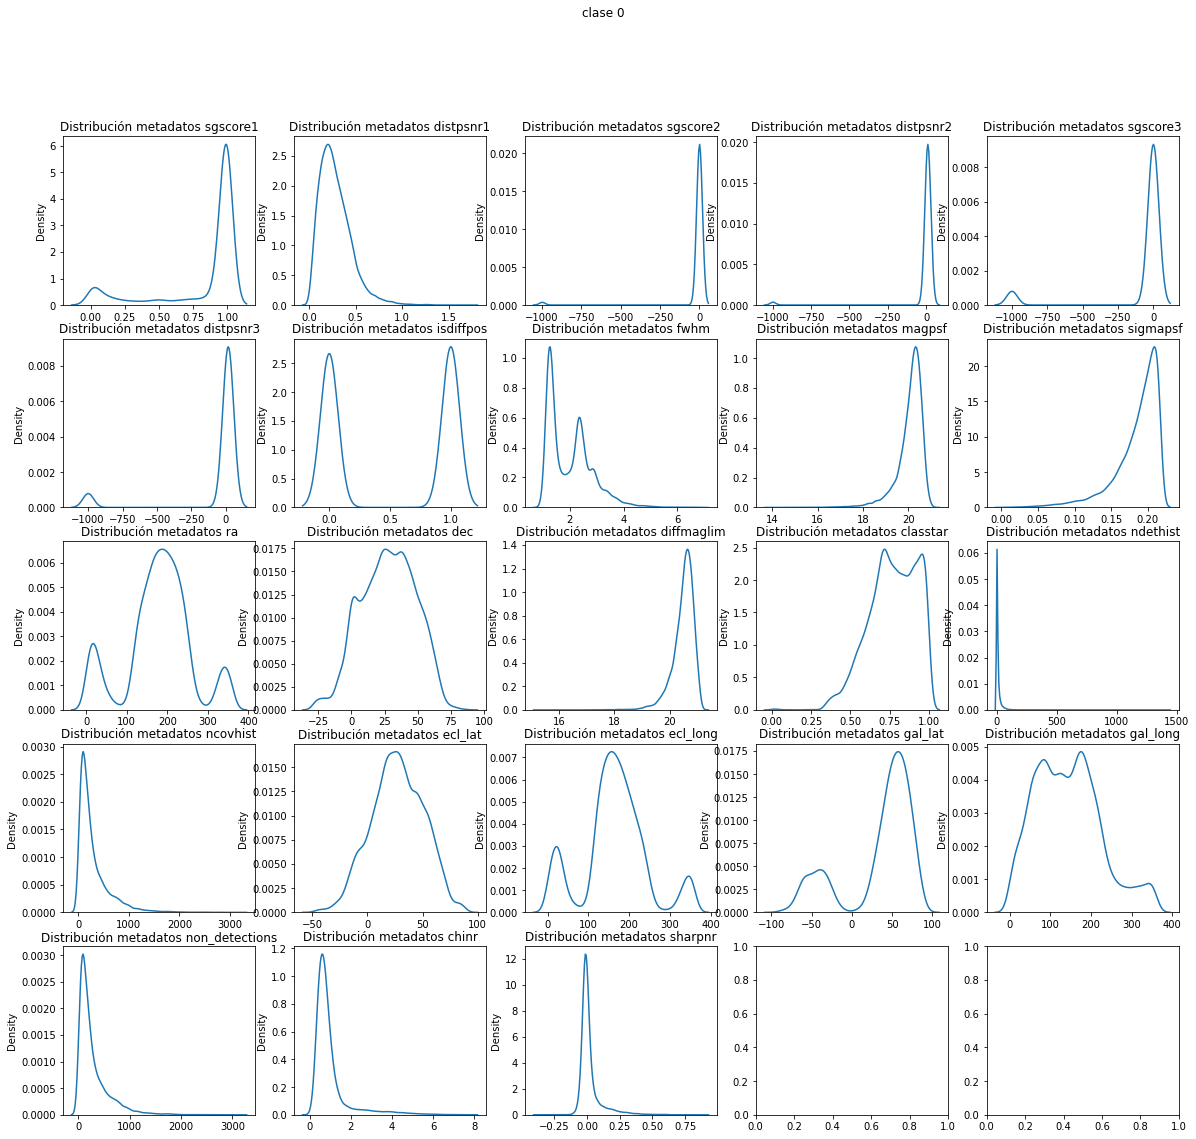

In [ ]:
dist_class(0,grid=True)

In [ ]:
#Class 1: Supernova (SN)
# dist_class(1,23)

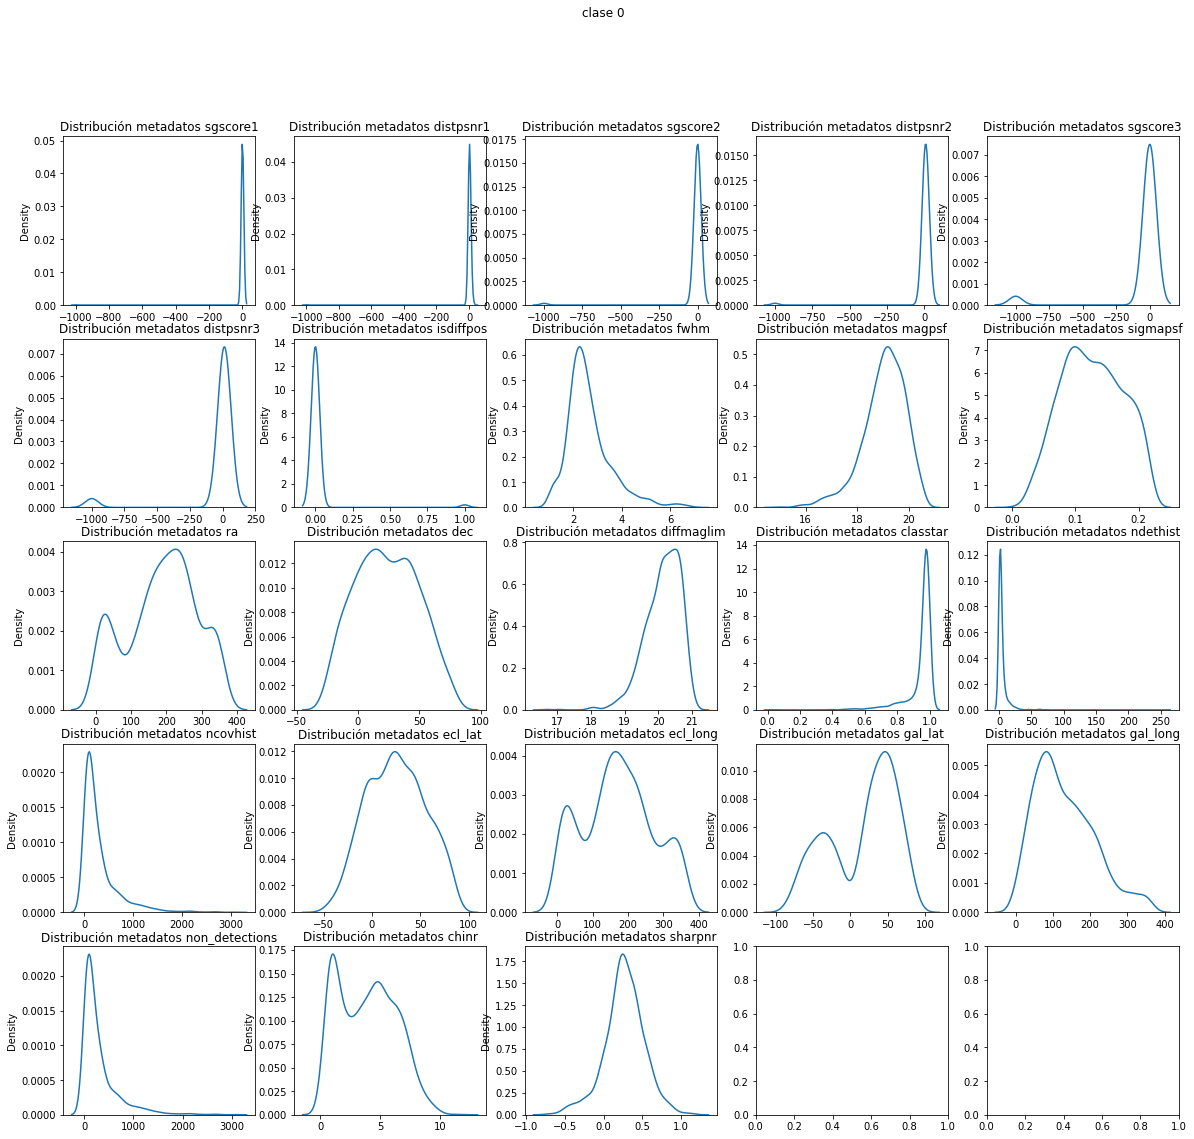

In [ ]:
dist_class(1,grid=True)

In [ ]:
#Class 2: Variable Star (VS)
# dist_class(2,23)

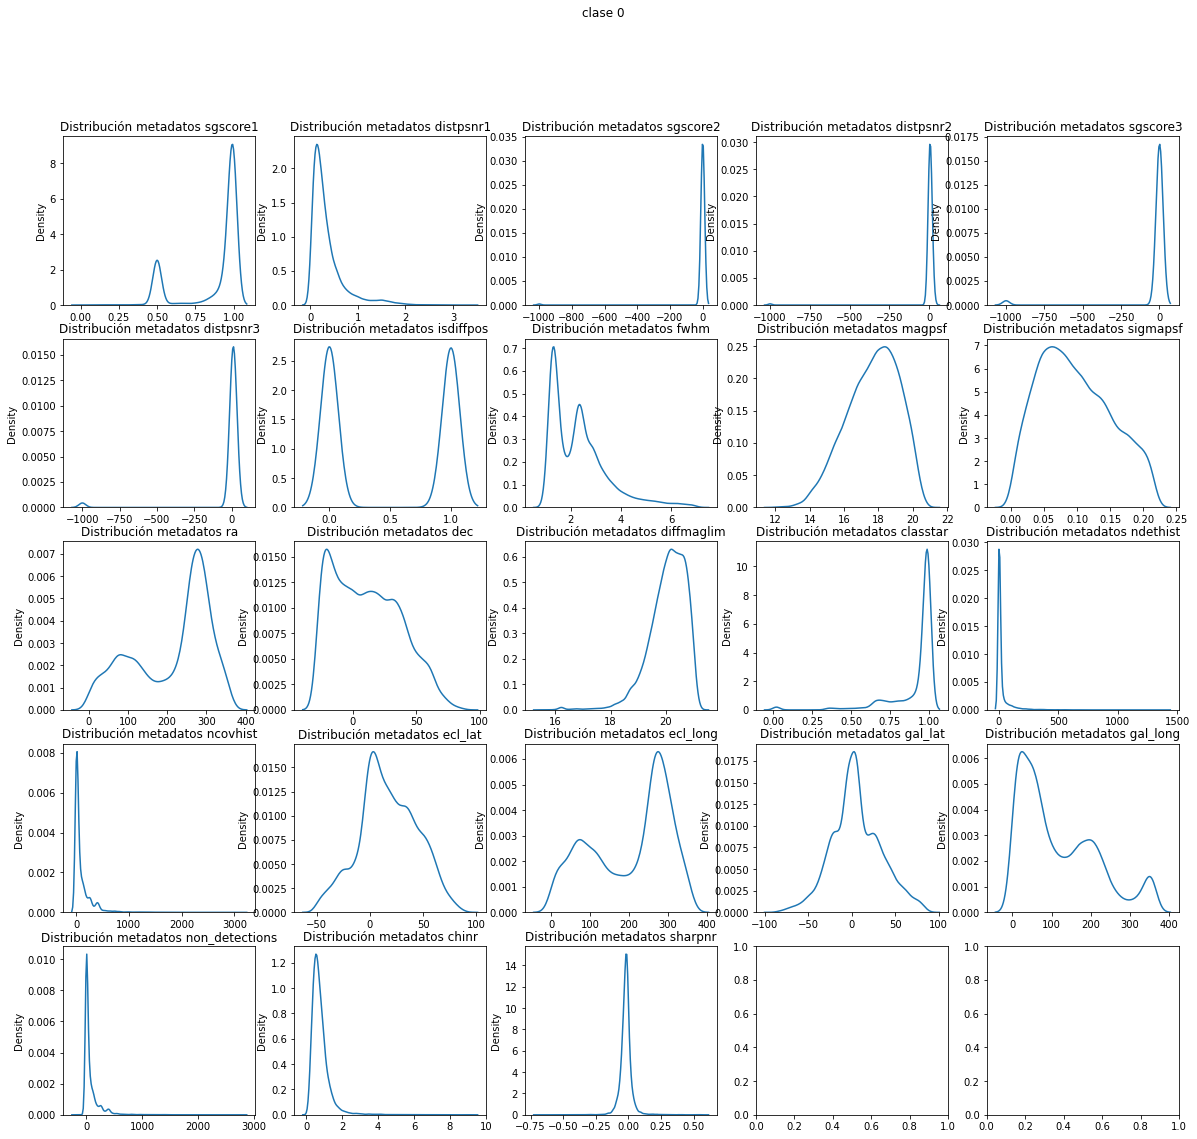

In [ ]:
dist_class(2,grid=True)

In [ ]:
#Class 3: Asteroid
# dist_class(3,23)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


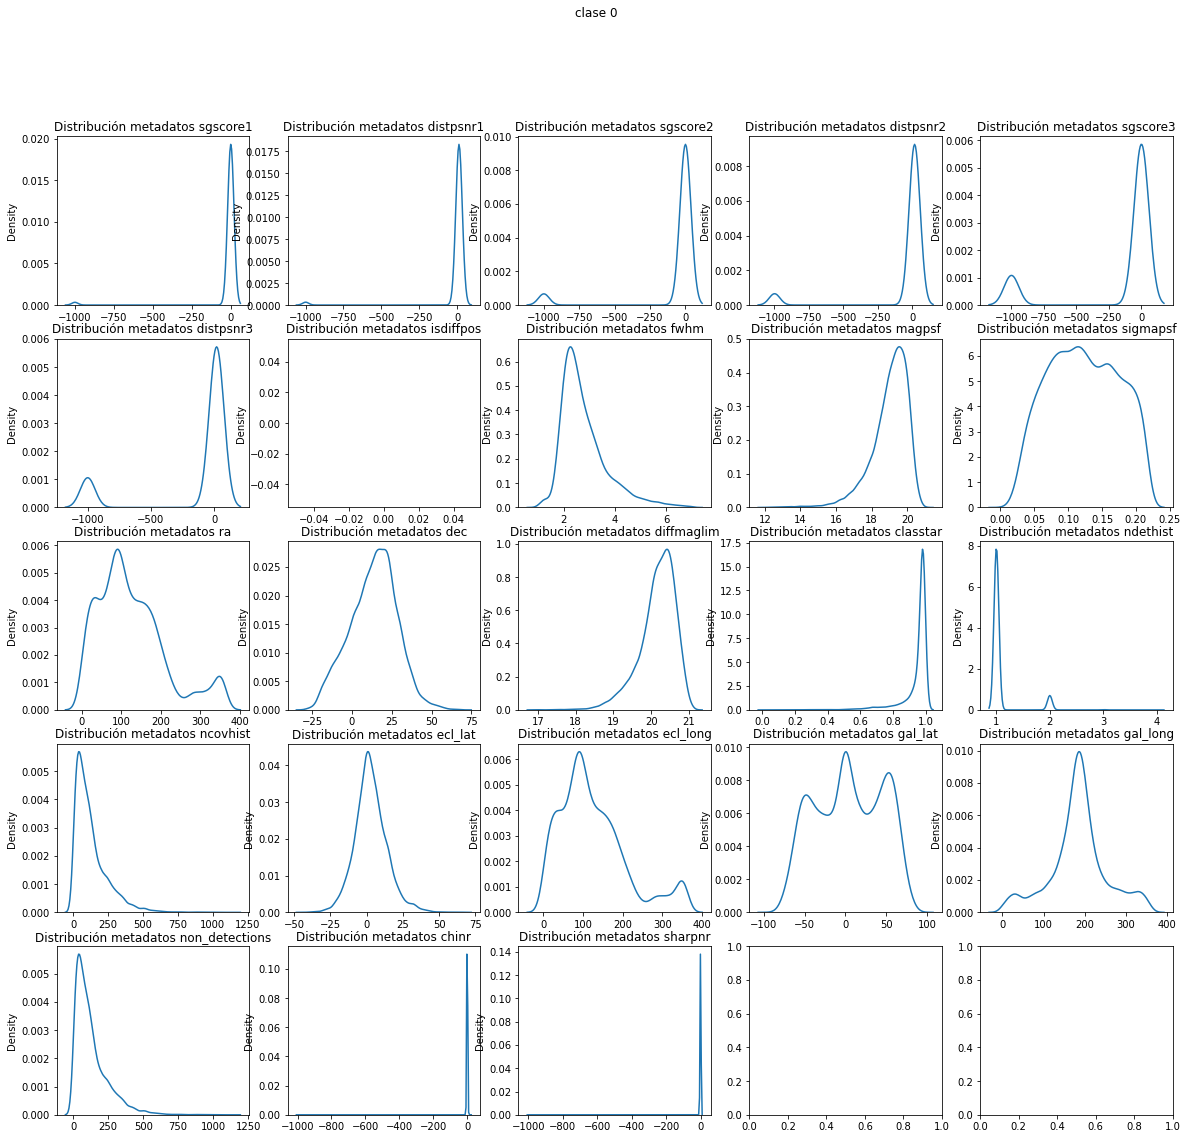

In [ ]:
dist_class(3,grid=True)

In [ ]:
#'isdiffpos' para clase 3 solo valores 0
print(f'Datos de feature isdiffpos para clase Asteroid (3):{metdat_dataset[labels_dataset == 3][:,6]}')
print(f'Suma de todos sus datos: {sum(metdat_dataset[labels_dataset == 3][:,6])}')

Datos de feature isdiffpos para clase Asteroid (3):[0 0 0 ... 0 0 0]
Suma de todos sus datos: 0


In [ ]:
#Class 4 : Bogus Artifacts
# dist_class(4,23)

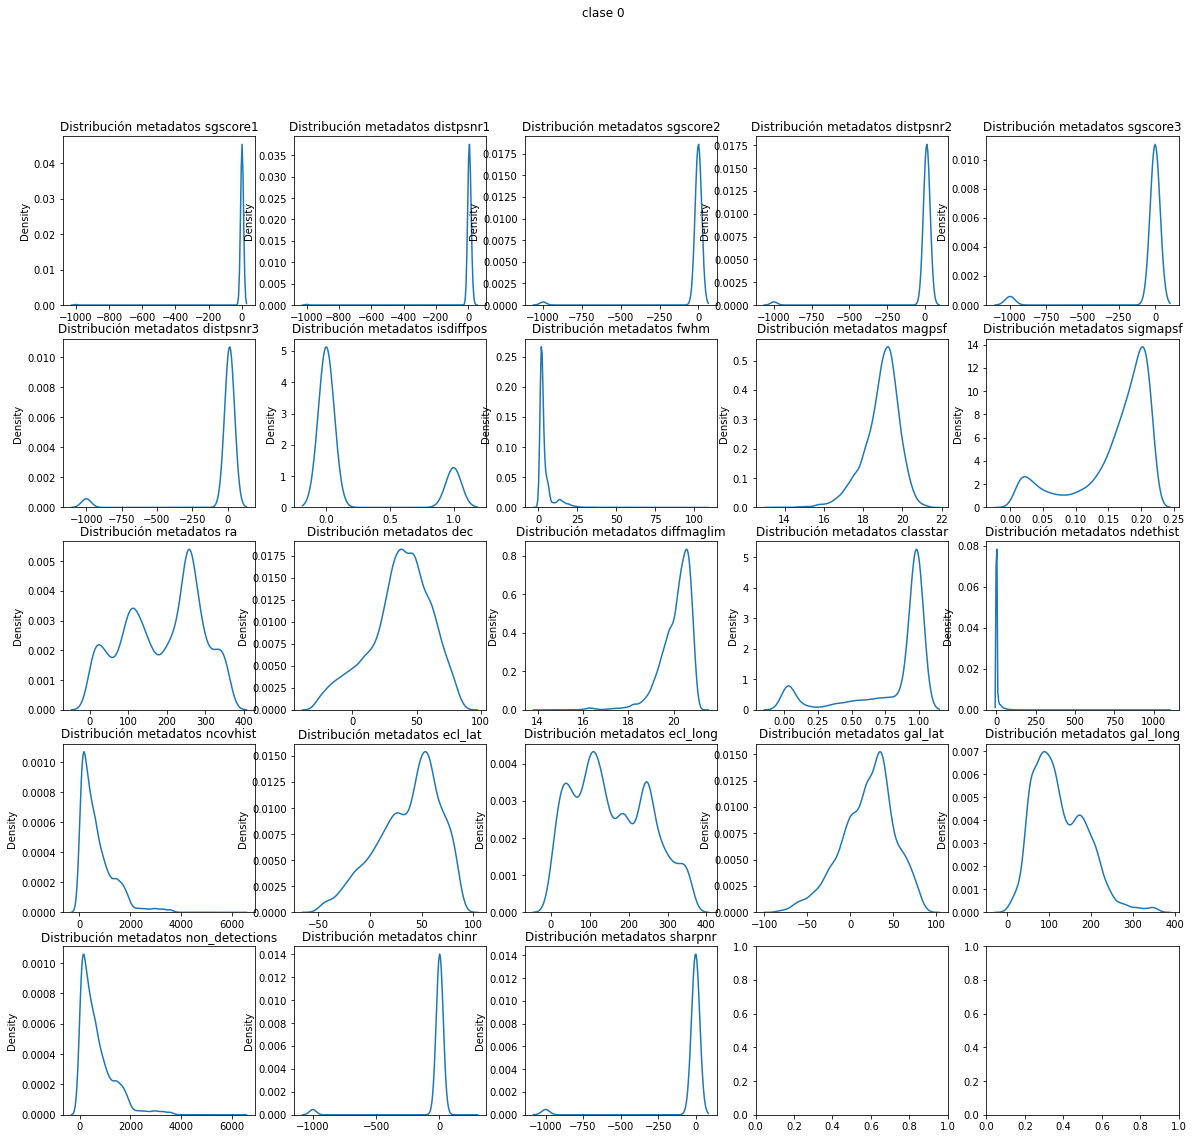

In [ ]:
dist_class(4,grid=True)

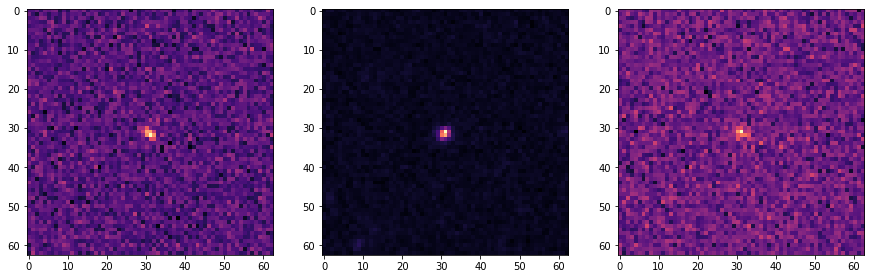

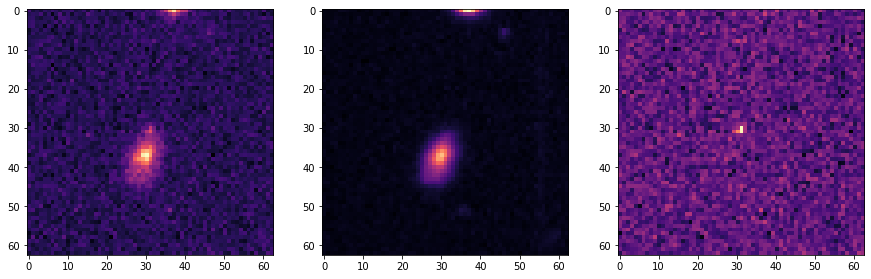

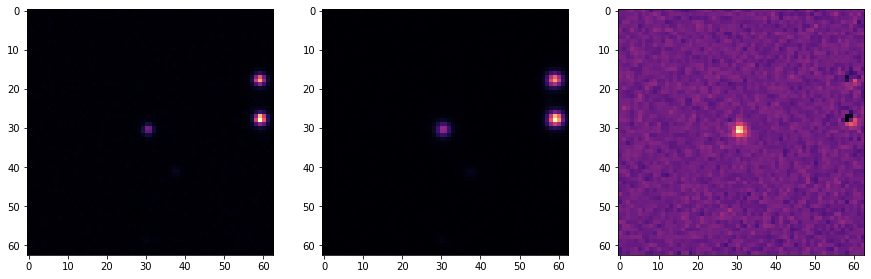

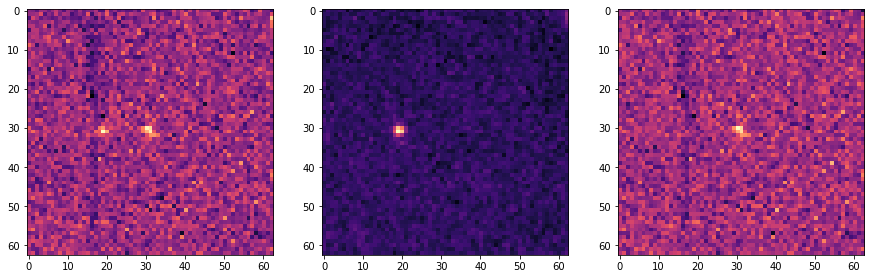

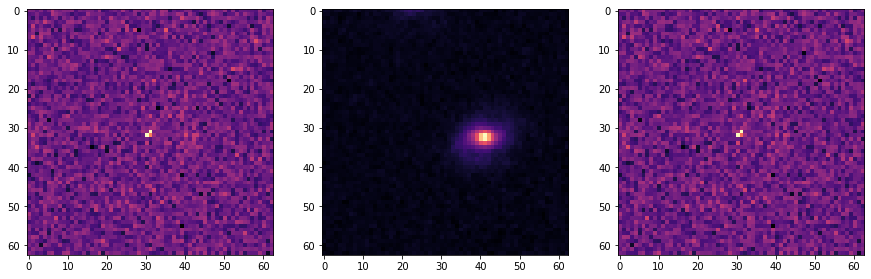

In [ ]:
# Visualización de imagenes para las 5 clases
# Estan en el orden AGN (0), SN (1), VS (2), Asteroid (3), Bogus (4)
n_ex = [5000, 1240, 18240, 45311, 42243]
#2: 18240 / 1: 1240 / 0:5000 / 3: 45311 / 4: 42243
color =  'magma'
for n in n_ex:
    fig, axs = plt.subplots(1,3,figsize=(15,15))
    
    first_image = images_dataset[n][:,:,0]
    second_image = images_dataset[n][:,:,1]
    third_image = images_dataset[n][:,:,2]
    pixels= [first_image.reshape((63, 63)), second_image.reshape((63, 63)), third_image.reshape((63, 63))]
    axs[0].imshow(pixels[0],cmap=color)
    axs[1].imshow(pixels[1],cmap=color)
    axs[2].imshow(pixels[2],cmap=color)

In [ ]:
# data_augmentation = tf.keras.Sequential([
#   layers.RandomFlip("horizontal_and_vertical"),
#   layers.RandomRotation(0.2),
# ])

# plt.figure(figsize=(10, 10))
# for i in range(9):
#   augmented_image = data_augmentation(third_image)
#   ax = plt.subplot(3, 3, i + 1)
#   plt.imshow(augmented_image[0])
#   plt.axis("off")

In [ ]:
# Se carga el escalador para normalizar los datos
scaler= preprocessing.StandardScaler()

In [ ]:
# Se crea un pandas de los datos para hacer más fácil el pre-procesamiento
metadatapd= pd.DataFrame(metdat_dataset,columns=metadata_keys)
metadatapd.head(3)

,sgscore1,distpsnr1,sgscore2,distpsnr2,sgscore3,distpsnr3,isdiffpos,fwhm,magpsf,sigmapsf,ra,dec,diffmaglim,classtar,ndethist,ncovhist,ecl_lat,ecl_long,gal_lat,gal_long,non_detections,chinr,sharpnr
0,0.0222917,0.990993,0.5,3.06432,0.5,3.9419,0,1.81,17.7582,0.0494658,18.6218,37.0494,20.4338,0.994,4,231,26.8342,32.0478,-25.5941,128.029,227,5.118,0.562
1,0.00416667,3.55299,0.730667,15.2506,0.721583,15.9988,0,1.83,20.1866,0.204326,259.043,1.42952,20.4464,0.797,3,10,24.4119,257.956,21.7554,22.8951,7,6.048,0.371
2,0.5,5.34691,0.5,6.2831,0.5,8.05645,0,3.93,19.2607,0.129144,181.128,23.8572,20.2426,0.973,6,326,22.2252,171.028,78.9229,227.507,320,5.925,0.36


In [ ]:
# No existen valores nan en los metadatos
metadatapd.isna().sum() 

sgscore1          0
distpsnr1         0
sgscore2          0
distpsnr2         0
sgscore3          0
distpsnr3         0
isdiffpos         0
fwhm              0
magpsf            0
sigmapsf          0
ra                0
dec               0
diffmaglim        0
classtar          0
ndethist          0
ncovhist          0
ecl_lat           0
ecl_long          0
gal_lat           0
gal_long          0
non_detections    0
chinr             0
sharpnr           0
dtype: int64

In [ ]:
# Límites inferiores de cada metadato
metadatapd.min(axis=0)

sgscore1         -999.000000
distpsnr1        -999.000000
sgscore2         -999.000000
distpsnr2        -999.000000
sgscore3         -999.000000
distpsnr3        -999.000000
isdiffpos           0.000000
fwhm               -0.850000
magpsf             12.033670
sigmapsf            0.000685
ra                  0.002221
dec               -27.985070
diffmaglim         14.138559
classtar            0.000000
ndethist            1.000000
ncovhist            1.000000
ecl_lat           -51.284163
ecl_long            0.000212
gal_lat           -89.511370
gal_long            0.000780
non_detections   -190.000000
chinr            -999.000000
sharpnr          -999.000000
dtype: float64

In [ ]:
# Límites superiores de cada metadato
metadatapd.max(axis=0)

sgscore1             1.000000
distpsnr1           29.986929
sgscore2             1.000000
distpsnr2           29.998390
sgscore3             1.000000
distpsnr3           29.997021
isdiffpos            1.000000
fwhm               106.440002
magpsf              21.455547
sigmapsf             0.217142
ra                 359.997222
dec                 87.015108
diffmaglim          21.245272
classtar             1.000000
ndethist          1436.000000
ncovhist          6258.000000
ecl_lat             89.771758
ecl_long           359.998352
gal_lat             89.520706
gal_long           359.998670
non_detections    6257.000000
chinr              217.156998
sharpnr              2.419000
dtype: float64

In [ ]:
# Define limites speriores e inferiores. Mismo orden que como estan las clases.
upper_limits = [None, None, None, None, None, None, None, 25  , None, None, None, None,  None, None,  200,  2100, None,    None, 
                None,    None,  2100,    None, None]

lower_limits = [-1,   -1,   -1,   -1,   -1,   -1,   None, None, None, None, None, None,  None, None,  None, None, None,   None, 
                None,    None,  None,    -1,   -1]

print(len(metadata_keys))
print(len(upper_limits))
print(len(lower_limits))

23
23
23


In [ ]:
# Se realiza un ''clipeo'' (se cambian los outliers por los límites impuestos) para cada metadato
metadatapd_limits = metadatapd.copy()
for i in range(len(metadata_keys)):
  metadatapd_limits[metadata_keys[i]].clip(lower=lower_limits[i], upper=upper_limits[i], inplace=True)

In [ ]:
# No quedan valores anómalos para límites inferiores 
metadatapd_limits.min(axis=0)

sgscore1           -1.000000
distpsnr1          -1.000000
sgscore2           -1.000000
distpsnr2          -1.000000
sgscore3           -1.000000
distpsnr3          -1.000000
isdiffpos           0.000000
fwhm               -0.850000
magpsf             12.033670
sigmapsf            0.000685
ra                  0.002221
dec               -27.985070
diffmaglim         14.138559
classtar            0.000000
ndethist            1.000000
ncovhist            1.000000
ecl_lat           -51.284163
ecl_long            0.000212
gal_lat           -89.511370
gal_long            0.000780
non_detections   -190.000000
chinr              -1.000000
sharpnr            -1.000000
dtype: float64

In [ ]:
# No quedan valores anómalos para límites superiores
metadatapd_limits.max(axis=0)

sgscore1             1.000000
distpsnr1           29.986929
sgscore2             1.000000
distpsnr2           29.998390
sgscore3             1.000000
distpsnr3           29.997021
isdiffpos            1.000000
fwhm                25.000000
magpsf              21.455547
sigmapsf             0.217142
ra                 359.997222
dec                 87.015108
diffmaglim          21.245272
classtar             1.000000
ndethist           200.000000
ncovhist          2100.000000
ecl_lat             89.771758
ecl_long           359.998352
gal_lat             89.520706
gal_long           359.998670
non_detections    2100.000000
chinr              217.156998
sharpnr              2.419000
dtype: float64

In [ ]:
# Se normalizan los datos mediante StandardScaler.
# Entrega array que puede ser util para pasar a tensor y/o para usar en entrenamiento
metadatapd_normalized = scaler.fit_transform(metadatapd_limits)
print(metadatapd_normalized.shape)

(52244, 23)


In [ ]:
metadatapd_normalized_pd = pd.DataFrame(metadatapd_normalized,columns=metadata_keys) 
metadatapd_normalized_pd.head(3)

,sgscore1,distpsnr1,sgscore2,distpsnr2,sgscore3,distpsnr3,isdiffpos,fwhm,magpsf,sigmapsf,ra,dec,diffmaglim,classtar,ndethist,ncovhist,ecl_lat,ecl_long,gal_lat,gal_long,non_detections,chinr,sharpnr
0,-1.787296,-0.495574,0.089892,-1.092536,0.206721,-1.208281,-0.70304,-0.389351,-0.822778,-1.530780,-1.687464,0.611624,0.360887,0.674586,-0.246158,-0.136391,0.189845,-1.416670,-1.092859,-0.142501,-0.117554,1.492652,2.885067
1,-1.834922,-0.064012,0.631272,0.609697,0.626453,0.290416,-0.70304,-0.381138,0.902523,1.049081,0.809464,-0.847362,0.381783,-0.294194,-0.282988,-0.694464,0.100871,0.959095,0.123636,-1.390822,-0.677706,1.849762,1.950245
2,-0.532044,0.238169,0.089892,-0.642923,0.206721,-0.696832,-0.70304,0.481240,0.244682,-0.203398,0.000270,0.071273,0.043102,0.571315,-0.172498,0.103504,0.020553,0.044920,1.592374,1.038655,0.119238,1.802532,1.896407


In [ ]:
# Se revisa la imagen más chica en el dataset
tensor_imgs=tf.convert_to_tensor(images_dataset[0], dtype=tf.float32)
largo=63
ancho=63
for i in range(len(images_dataset)):
    if images_dataset[i].shape[1] < largo:
        largo=images_dataset[i].shape[1]
    elif images_dataset[i].shape[0] < ancho:
        ancho=images_dataset[i].shape[0]
print(f'largo={largo},ancho={ancho}')

largo=41,ancho=41


Se puede ver que la imagen más chica en el dataset es de 41x41, por lo que se decide realizar un recorte de ese tamaño al centro.

In [ ]:
# Funcion para recortar una imagen
# Se le pasa una imagen y el ancho y alto por el que se requiere recortar
def center_crop(img, new_width=41, new_height=41):        

    width = img.shape[1]
    height = img.shape[0]

    if new_width is None:
        new_width = min(width, height)

    if new_height is None:
        new_height = min(width, height)

    left = int(np.ceil((width - new_width) / 2))
    right = width - int(np.floor((width - new_width) / 2))

    top = int(np.ceil((height - new_height) / 2))
    bottom = height - int(np.floor((height - new_height) / 2))

    if len(img.shape) == 2:
        center_cropped_img = img[top:bottom, left:right]
    else:
        center_cropped_img = img[top:bottom, left:right, ...]

    return center_cropped_img

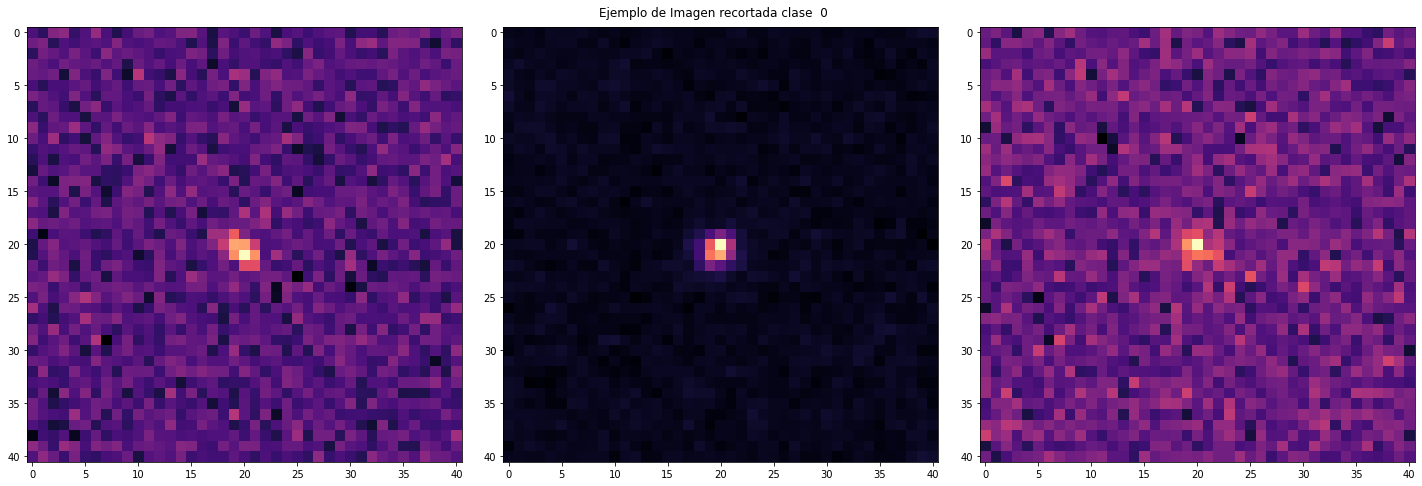

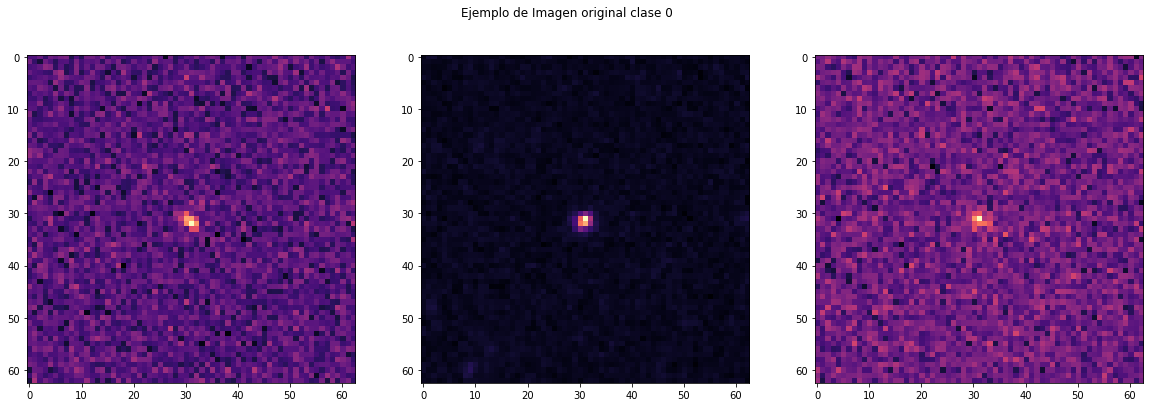

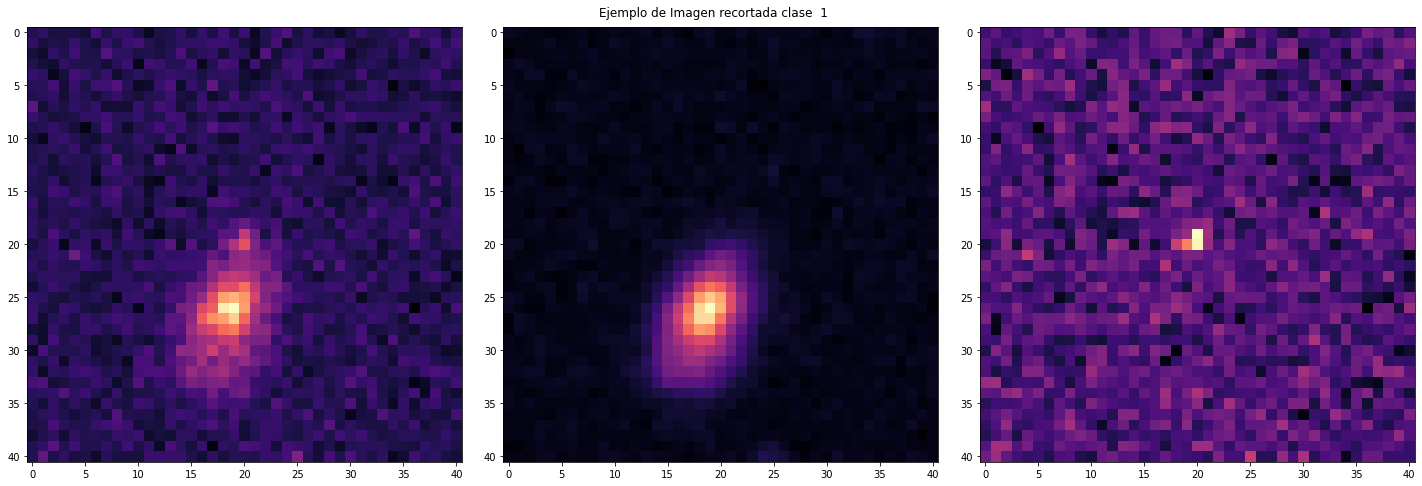

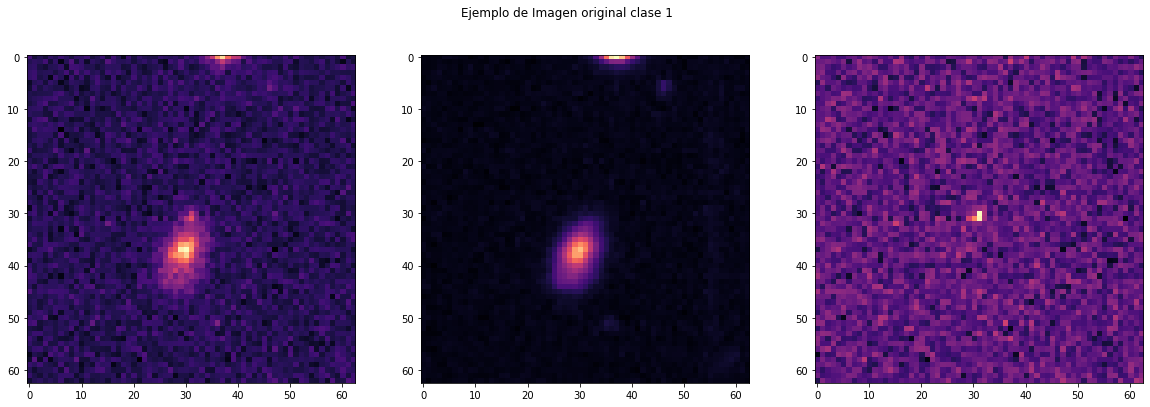

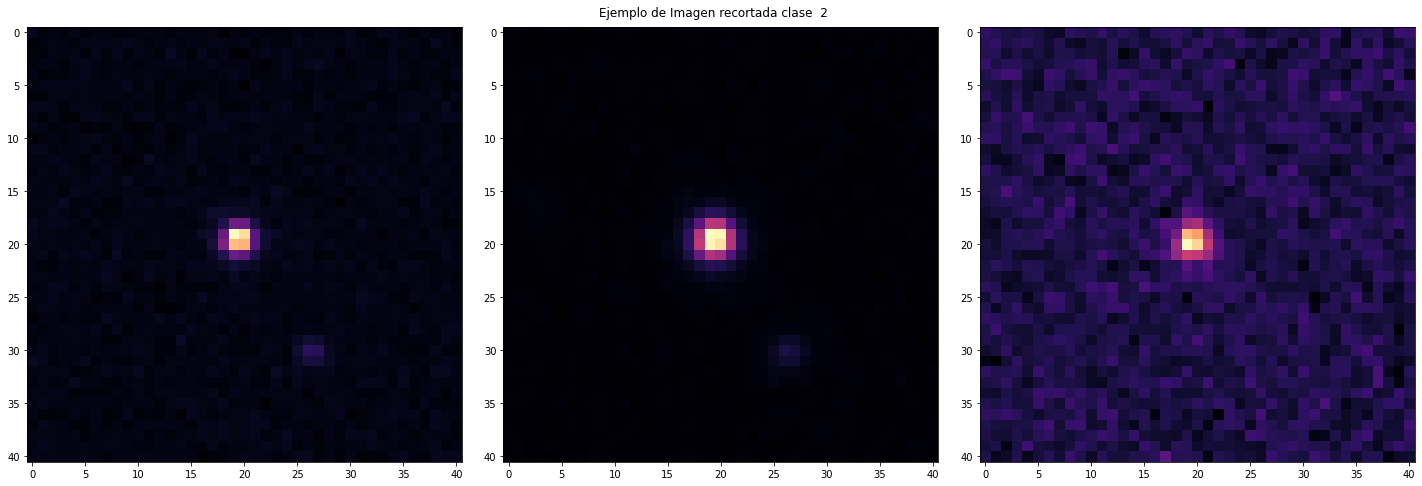

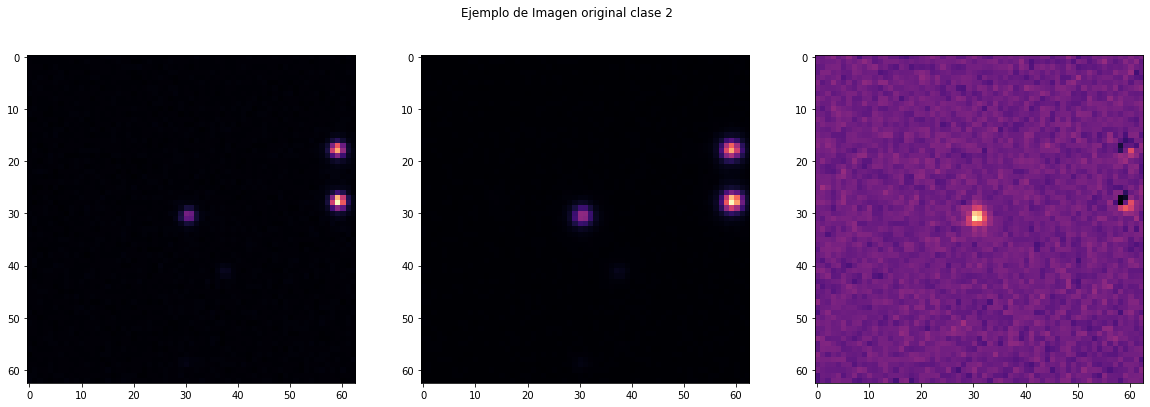

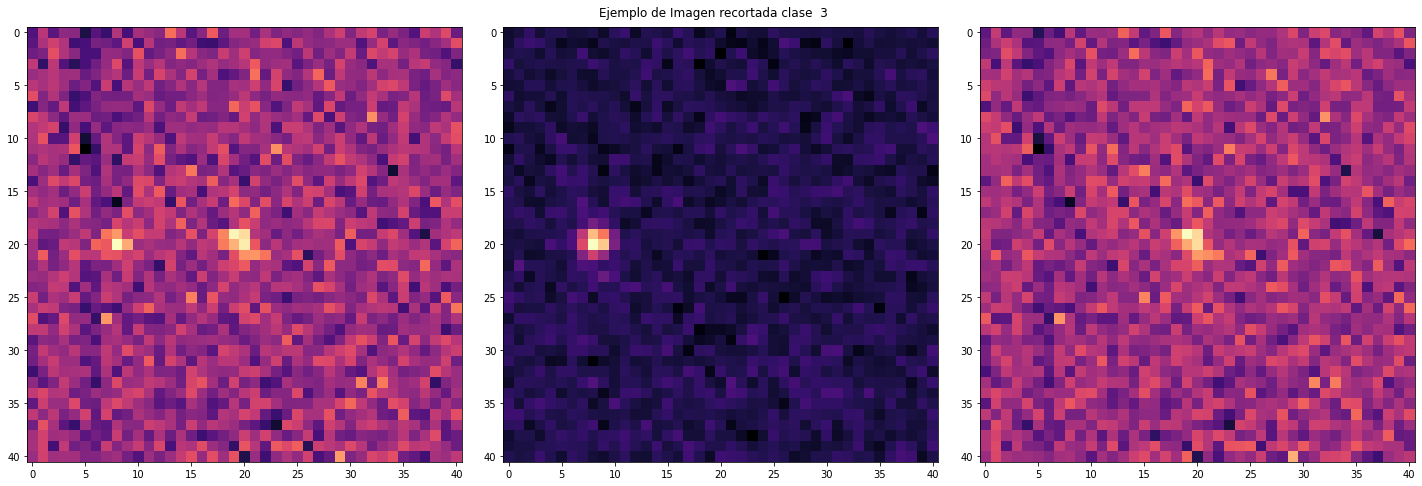

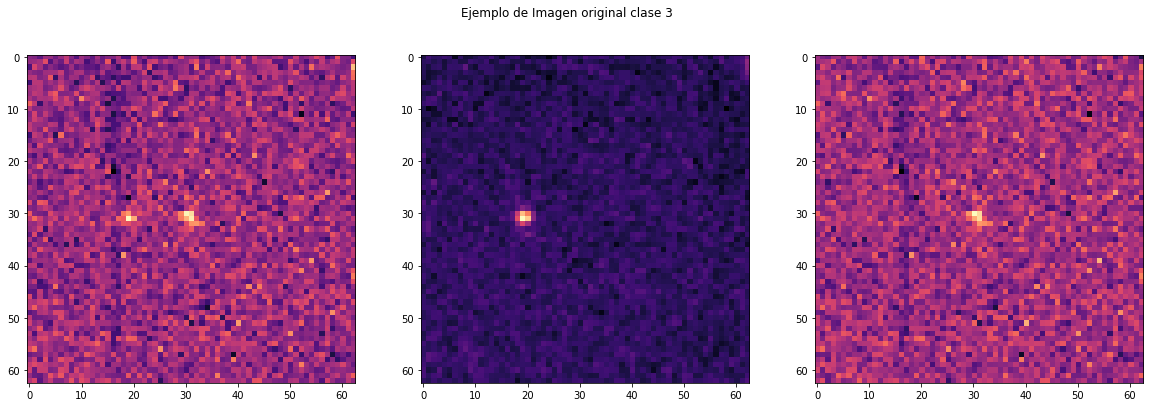

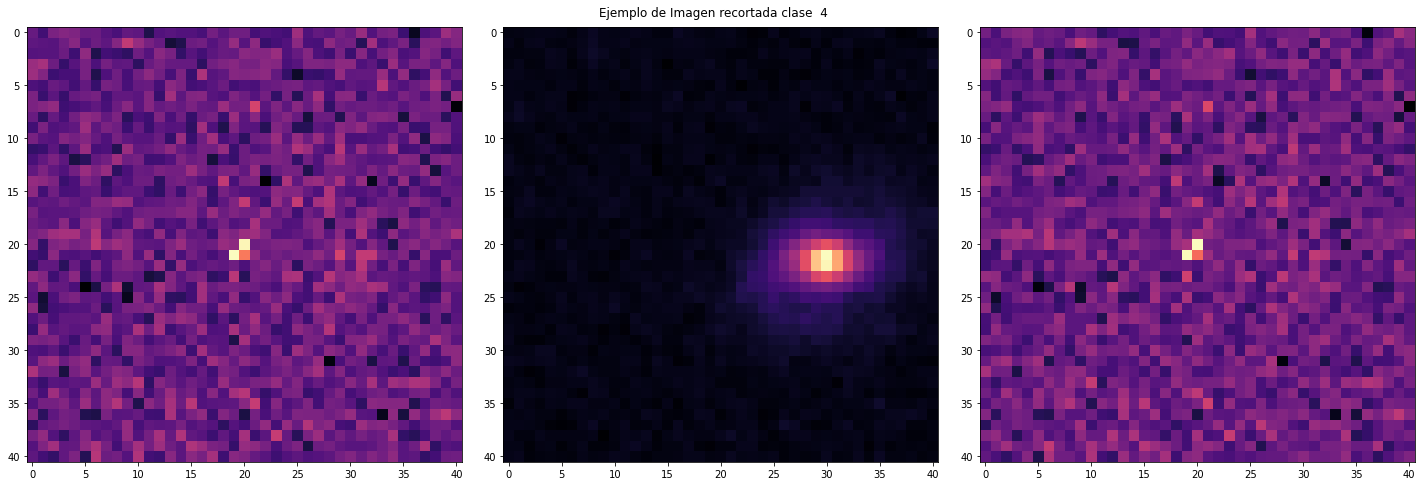

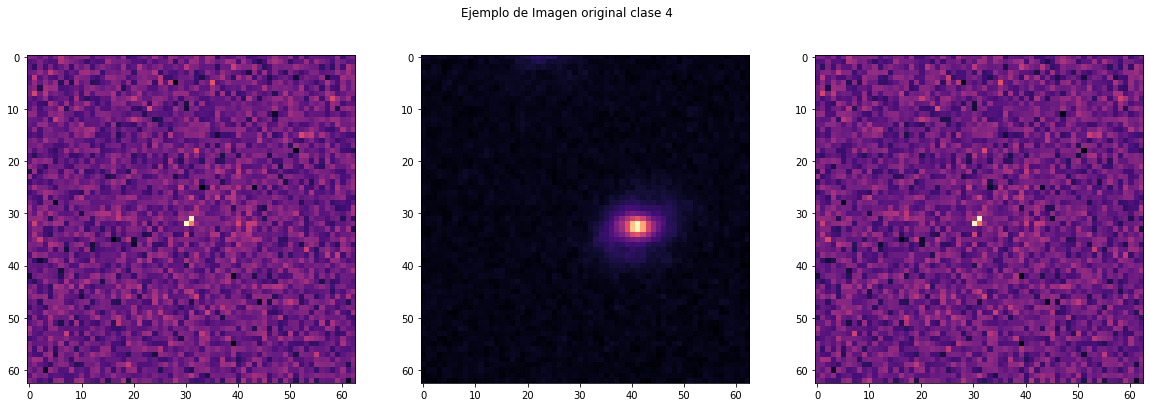

In [ ]:
# Se visualiza un ejemplo de las imagenes recortadas con la imagen original
color =  'magma'
for n in n_ex:
    fig, axs = plt.subplots(1,3,figsize=(20,20))
    fig.tight_layout()
    fig.subplots_adjust(top=0.95)
    first_image_rec = center_crop(images_dataset[n][:,:,0])
    second_image_rec = center_crop(images_dataset[n][:,:,1])
    third_image_rec = center_crop(images_dataset[n][:,:,2])
    pixels= [first_image_rec.reshape((41, 41)), second_image_rec.reshape((41, 41)), third_image_rec.reshape((41, 41))]
    axs[0].imshow(pixels[0],cmap=color)
    axs[1].imshow(pixels[1],cmap=color)
    axs[2].imshow(pixels[2],cmap=color)
    fig.suptitle(f'Ejemplo de Imagen recortada clase  {labels_dataset[n]}', y=0.65)
    
    plt.show()

    fig, axs = plt.subplots(1,3,figsize=(20,20))
    
    first_image = images_dataset[n][:,:,0]
    second_image = images_dataset[n][:,:,1]
    third_image = images_dataset[n][:,:,2]
    pixels= [first_image.reshape((63, 63)), second_image.reshape((63, 63)), third_image.reshape((63, 63))]
    axs[0].imshow(pixels[0],cmap=color)
    axs[1].imshow(pixels[1],cmap=color)
    axs[2].imshow(pixels[2],cmap=color)
    fig.suptitle(f'Ejemplo de Imagen original clase {labels_dataset[n]}', y=0.65)
    plt.show()

In [ ]:
t_i_preproc= time.time()

scalerMinMax = preprocessing.MinMaxScaler(feature_range=(-1,1))
img_crop = 25 #41
images_dataset_pre_proc_2 = np.zeros((52244,img_crop,img_crop,3))

img_shape = (img_crop,img_crop,3)

# Se aplica la transformacion a cada canal independiendte
# https://stackoverflow.com/questions/37751717/why-does-minmaxscaler-add-lines-to-image
for i in range(52243):
  images_dataset_pre_proc_2[i] = scalerMinMax.fit_transform(np.array([np.nan_to_num(center_crop(
      images_dataset[i][:,:,0],new_width=img_crop, new_height=img_crop), copy=True, nan=0.0),
      np.nan_to_num(center_crop(images_dataset[i][:,:,1],new_width=img_crop, new_height=img_crop), copy=True, nan=0.0),
      np.nan_to_num(center_crop(images_dataset[i][:,:,2],new_width=img_crop, new_height=img_crop), copy=True, nan=0.0)]
      ).T.reshape(-1,3)).reshape(img_shape)

t_f_preproc= time.time()
print(images_dataset_pre_proc_2.shape)
print(f'Tiempo de preprocesamiento: {t_f_preproc-t_i_preproc}[s]')

(52244, 25, 25, 3)
Tiempo de preprocesamiento: 21.57852792739868[s]


In [ ]:
print(images_dataset[0].shape)
print(images_dataset_pre_proc_2[0].shape)

(63, 63, 3)
(25, 25, 3)


In [ ]:
# images_tensor = tf.convert_to_tensor(images_dataset_pre_proc_2)
# images_tensor

In [ ]:
labels_binario_2 = np.copy(labels_dataset)
labels_binario_2[labels_binario_2 != 1 ] = 0
labels_binario_2

array([1, 1, 1, ..., 0, 0, 0])

In [ ]:

X_train, X_test, y_train, y_test = \
            train_test_split(images_dataset_pre_proc_2, labels_dataset, test_size=0.2, random_state=4106)

X_train, X_val, y_train, y_val = \
            train_test_split(X_train, y_train, test_size=0.25, random_state=4106) # 0.25 x 0.8 = 0.2

In [ ]:
print(X_train.shape) 
print(X_val.shape)
print(X_test.shape)
print(y_train.shape)
print(y_val.shape) 
print(y_test.shape)

(31346, 25, 25, 3)
(10449, 25, 25, 3)
(10449, 25, 25, 3)
(31346,)
(10449,)
(10449,)


In [ ]:
!pip install umap-learn

     |████████████████████████████████| 86 kB 5.7 MB/s 
     |████████████████████████████████| 1.1 MB 38.1 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.2-py3-none-any.whl size=82709 sha256=b03d7f04a2795fcce2cb881f74dc191763c28cdab7baea1b000d846236ac4771
  Stored in directory: /root/.cache/pip/wheels/84/1b/c6/aaf68a748122632967cef4dffef68224eb16798b6793257d82
  Created wheel for pynndescent: filename=pynndescent-0.5.5-py3-none-any.whl size=52603 sha256=488f85e30639fa43b83b84a47684322e3c9276ae99ca3238354d41465347cf8c
  Stored in directory: /root/.cache/pip/wheels/af/e9/33/04db1436df0757c42fda8ea6796d7a8586e23c85fac355f476
Successfully built umap-learn pynndescent


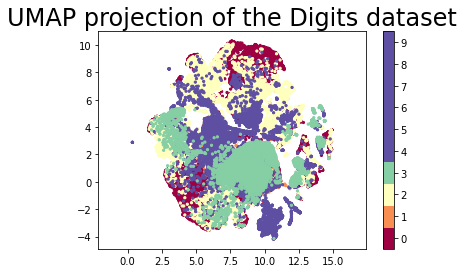

In [ ]:
import umap

reducer = umap.UMAP(n_neighbors=5 , n_components=2, learning_rate=0.1, min_dist=0.125, random_state=4106)

dims = (41, 41, 3)

embedding = reducer.fit_transform(np.asarray(metadatapd_normalized).astype('float32'))

plt.scatter(embedding[:, 0], embedding[:, 1], c=labels_dataset, cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('UMAP projection of the Digits dataset', fontsize=24);

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


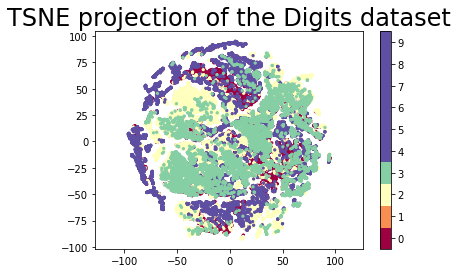

In [ ]:
from sklearn.manifold import TSNE
t_sne = TSNE(n_components=2, perplexity=30, learning_rate=400, random_state=4106)
X_embedded = t_sne.fit_transform(np.asarray(metadatapd_limits).astype('float32'))

plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=labels_dataset, cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('TSNE projection of the Digits dataset', fontsize=24);

In [ ]:
data_metadata = np.asarray(metadatapd_limits).astype('float32')
data_umap = False
data_tnse = False
if data_umap:
  reducer = umap.UMAP(n_neighbors=20 , n_components=10, learning_rate=1, min_dist=0.0125, random_state=4106)
  data_metadata_umap = reducer.fit_transform(np.asarray(metadatapd_limits).astype('float32'))
if (not data_umap) and data_tnse:
  t_sne = TSNE(n_components=2, perplexity=30, learning_rate=400, random_state=4106)
  data_metadata_tsne = t_sne.fit_transform(np.asarray(metadatapd_limits).astype('float32'))